# TABLE OF CONTENTS
0. [Introduction](#0.-Introduction)
1.[Exploratory data analysis](#1.-Exploratory-data-analysis)
2. [Model Building](#2.-Model-Building)
3. [Class Emballancement with SMOTE Algorithm](#3.-Class-Emballancement-with-SMOTE-Algorithm)
4. [Class Emballancement with NearMiss Algorithm](#4.-Class-Emballancement-with-NearMiss-Algorithm)
5. [Model Comparison](#5.-Model-Comparison)
6. [Using the best model for Prediction](#6.-Using-the-best-model-for-Prediction)

## 0. Introduction

In this projet, we will build an algorithm that predict fraudulent credit cards transactions using a dataset  pulled from Kaggle.com. It contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



#### 1. Import Libraries and Dependencies

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split #split model into test and strain data
#from sklearn import svm #support vector machine
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score #used to evaluate the model how it perform on the data set
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


#### Loading the dataset

In [28]:
data= pd.read_csv('creditcard.csv')

#### Basic information about the dataset

In [29]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
data.shape

(284807, 31)

## 1. Exploratory data analysis

In [32]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [33]:
# Number of fraud transactions.
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

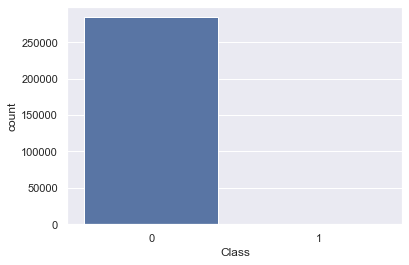

In [34]:
#To explore the class.  
sns.countplot(data['Class'])
plt.show()

This shows that our data is very unbalanced as we have a lot more legit transactions than fraudulent transactions. The fraudulent class 1 is very low. Data need to be balanced.

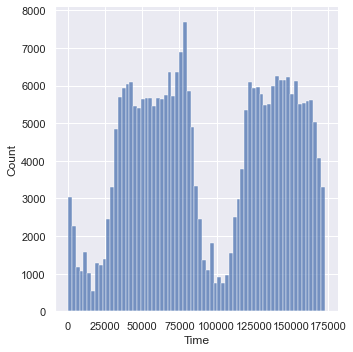

In [35]:
#To display the column time: 
sns.displot(data['Time'])
plt.show()

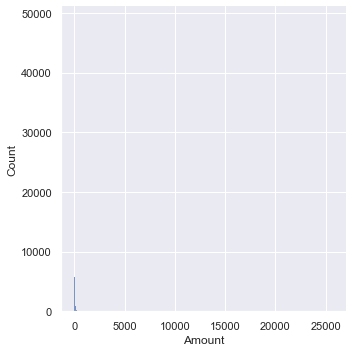

In [36]:
sns.displot(data['Amount'])
plt.show()

#### Correlation Matrix

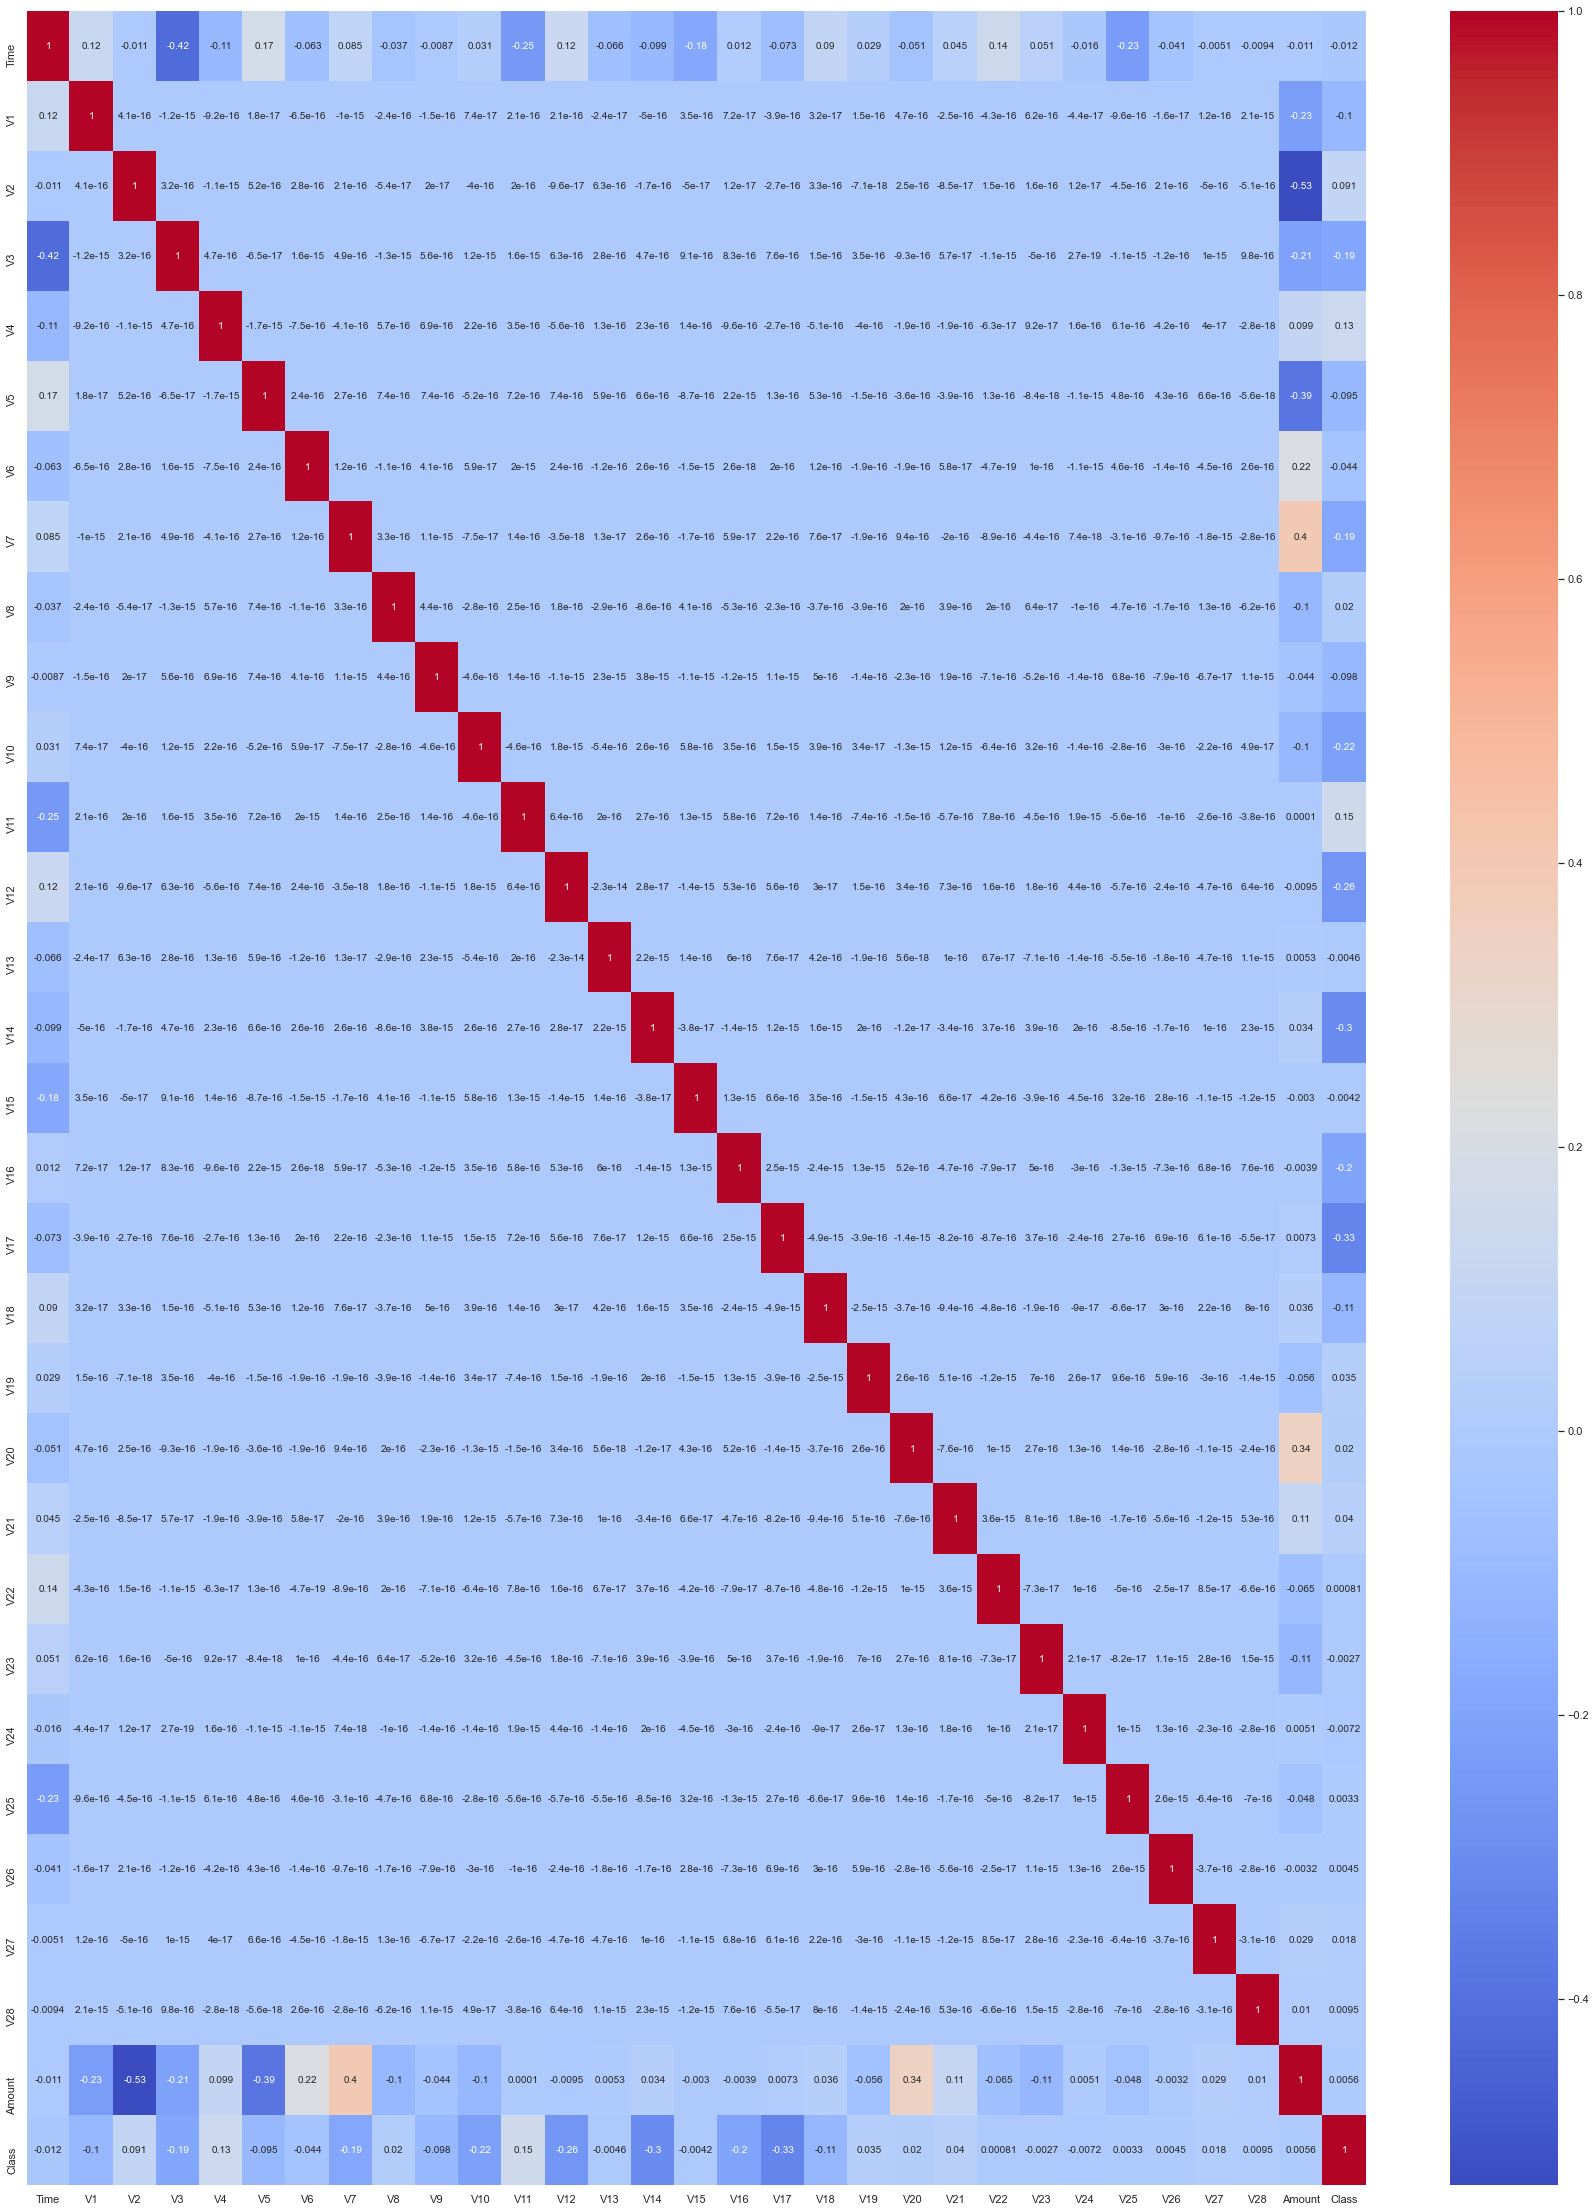

In [37]:
Correl = data.corr()
plt.figure(figsize=(30,40))
sns.heatmap(Correl, annot = True, cmap = 'coolwarm')
plt.show()

Our features are not highly correlated. So they will all contribute in the prediction.

#### Splitting the Data

In [38]:
X = data.drop(columns=['Class'], axis=1)
y = data['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [39]:
# For each X, calculate VIF(variable inflation factor) to measure the amount of multicollinearity and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values.astype(int), i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif_sorted = vif.sort_values(by="VIF Factor", ascending=False)
vif_sorted.head()

,VIF Factor,features
29,6.502903,Amount
2,2.569325,V2
7,1.920841,V7
5,1.876801,V5
20,1.845355,V20


Again, we have little worries for multicolliniearity. 

#### Standardizing the data

Our dataset have large differences between data values, so we will standardize our features before constructing the model.

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [41]:
x_scaler[-1]  #Last input

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

## 2. Model Building

In [42]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score #used to evaluate the model how it perform on the data set
from sklearn.metrics import r2_score

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y,test_size=0.20, random_state=42, stratify=y)

##### With Logistic regression Model

In [44]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
f1Score_Log1 = f1_score(y_test, y_pred1)
print("f1-score =" ,f1Score_Log1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

f1-score = 0.7314285714285713


Notice that the recall accuracy of majority is 100% but the recall accuracy of the minority class is only 65%.  Accuracy is 100% due to standardscaler. Moreover, f1-score is a combination of both precision and recall. With f1-score =0.73, we need a better model

##### Random Forest Classifier 

In [46]:
#train test split
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
f1Score_RF1 = f1_score(y_test, y_pred2)
print("f1-score =", f1Score_RF1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

f1-score = 0.8804347826086957


We get better results with the RandomForestClassifier model. Again, notice that the recall accuracy of majority is 100% but the recall accuracy of the minority class is only 84%.  Accuracy is 100% due to standardscaler. Moreover, f1-score is a combination of both precision and recall. With f1-score =0.88, we can probably do better using either oversampling or undersampling.

##### XGBOOST Classifier

In [48]:
from xgboost import XGBClassifier
model3 = XGBClassifier()
model3.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
f1Score_XGBC1 = f1_score(y_test, y_pred3)
print("f1-score =", f1Score_XGBC1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

f1-score = 0.8695652173913043


We get better results with the RandomForestClassifier model. Again, notice that the recall accuracy of majority is 100% but the recall accuracy of the minority class is only 82%. Accuracy is 100% due to standardscaler. Moreover, f1-score is a combination of both precision and recall. Again, with f1-score =0.87, we can probably do better using either oversampling or undersampling.

This model performs better than the previous models.

## 3. Class Emballancement with SMOTE Algorithm

We will see what happens if we balance the class in equal distribution. Since the data are unbalanced, we will either increase the minority class or decrease the majority class since some machine learning algorithms discriminate may the minority class. We start by increasing the minority class witn the SMOTE algorithm.

<AxesSubplot:xlabel='Class', ylabel='count'>

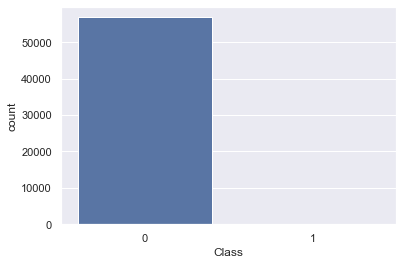

In [50]:
#y_test now
sns.countplot(y_test)

In [51]:
# import SMOTE module from imblearn library

# pip install imblearn (if you don't have imblearn in your system)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_o, y_train_o = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_o.shape))

print('After OverSampling, the shape of train_y: {} \n'.format(y_train_o.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_o == 1)))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_o == 0)))


After OverSampling, the shape of train_X: (454902, 30)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451


Now both categories have the same amount of values as the majority class. We will now proceed with the ML algorithm

#### Logistic regression Model

##### Model training

In [52]:
model1.fit(X_train_o, y_train_o.ravel())

predl2 = model1.predict(x_test)

##### Model evaluation

In [53]:
print(classification_report(y_test, predl2))
f1Score_Log2 = f1_score(y_test, predl2)
print("f1-score=" ,f1Score_Log2)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

f1-score= 0.10843373493975904


Recall accuracy of majority and minority classes are above 90 %. This is a good model.

##### Random Forest Classifier

In [54]:
model2 = RandomForestClassifier()
model2.fit(X_train_o, y_train_o.ravel())
y_predR2 = model2.predict(x_test)

In [55]:
print(classification_report(y_test, y_predR2))
f1Score_RF2 = f1_score(y_test, y_predR2)
print("f1-score =", f1Score_RF2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

f1-score = 0.8526315789473684


##### XGBOOST Classifier

In [56]:
model3 = XGBClassifier()
model3.fit(X_train_o, y_train_o.ravel())
predXGB2 = model3.predict(x_test)

In [57]:
print(classification_report(y_test, predXGB2))
f1Score_XGBC2 = f1_score(y_test, predXGB2)
print("f1-score =", f1Score_XGBC2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.87      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

f1-score = 0.7981220657276995


## 4. Class Emballancement with NearMiss Algorithm

Now, we will decrease the majority class witn the NearMiss algorithm.

In [58]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))

print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before Undersampling, counts of label '1': 394
Before Undersampling, counts of label '0': 227451 



In [59]:
# apply near miss

from imblearn.under_sampling import NearMiss

nr = NearMiss()
X_train_u, y_train_u = nr.fit_sample(x_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_u.shape))

print('After Undersampling, the shape of train_y: {} \n'.format(y_train_u.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_u == 1)))

print("After Undersampling, counts of label '0': {}".format(sum(y_train_u == 0)))

After Undersampling, the shape of train_X: (788, 30)
After Undersampling, the shape of train_y: (788,) 

After Undersampling, counts of label '1': 394
After Undersampling, counts of label '0': 394


Now both categories have the same amount of values as the majority class. We will now proceed with the ML algorithm.

In [60]:
#Logistic regression Model

In [61]:
# Model training

In [62]:
model1.fit(X_train_u, y_train_u.ravel())

predl3 = model1.predict(x_test)

#### Model Evaluation

In [63]:
print(classification_report(y_test, predl3))
f1Score_Log3 = f1_score(y_test, predl3)
print("f1-score=" ,f1Score_Log3)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     56864
           1       0.00      0.96      0.01        98

    accuracy                           0.60     56962
   macro avg       0.50      0.78      0.38     56962
weighted avg       1.00      0.60      0.75     56962

f1-score= 0.008272099265191183


#### Random Forest Classifier

In [64]:
model2 = RandomForestClassifier()
model2.fit(X_train_u, y_train_u.ravel())
predR3 = model2.predict(x_test)

In [65]:
print(classification_report(y_test, predR3))
f1Score_RF3 = f1_score(y_test, predR3)
print("f1-score =", f1Score_RF3)

              precision    recall  f1-score   support

           0       1.00      0.04      0.07     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.04     56962
   macro avg       0.50      0.52      0.04     56962
weighted avg       1.00      0.04      0.07     56962

f1-score = 0.003571819076429638


#### XGBOOST Classifier

In [66]:
model3 = XGBClassifier()
model3.fit(X_train_u, y_train_u.ravel())
predXGB3 = model3.predict(x_test)

In [67]:
print(classification_report(y_test, predXGB3))
f1Score_XGBC3 = f1_score(y_test, predXGB3)
print("f1-score =", f1Score_XGBC3)

              precision    recall  f1-score   support

           0       1.00      0.12      0.22     56864
           1       0.00      0.97      0.00        98

    accuracy                           0.12     56962
   macro avg       0.50      0.55      0.11     56962
weighted avg       1.00      0.12      0.22     56962

f1-score = 0.003788331937632093


## 5. Model Comparison

In [68]:
Models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Random Forest Classifier','XG BOOST Classifier', 'Logistic Regression with SMOTE','Random Forest Classifier with SMOTE','XG BOOST Classifier with SMOTE',
        'Logistic Regression with NearMiss','Random Forest Classifier with NearMiss','XG BOOST Classifier with NearMiss'
        
    ],
    
    'f1-Score': [
        f1Score_Log1, f1Score_RF1, f1Score_XGBC1,f1Score_Log2, f1Score_RF2, f1Score_XGBC2, 
       f1Score_Log3, f1Score_RF3, f1Score_XGBC3
    ]
})

In [69]:
pd.set_option('precision',4)

Models.sort_values(by='f1-Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,f1-Score
Random Forest Classifier,0.8804
XG BOOST Classifier,0.8696
Random Forest Classifier with SMOTE,0.8526
XG BOOST Classifier with SMOTE,0.7981
Logistic Regression,0.7314
Logistic Regression with SMOTE,0.1084
Logistic Regression with NearMiss,0.0083
XG BOOST Classifier with NearMiss,0.0038
Random Forest Classifier with NearMiss,0.0036


Based on this comparison, it is clear that the Random Forest Classifier with SMOTE provides a good and the best among these models.

## 6. Using the best model for Prediction

In [70]:
model2.fit(X_train_o, y_train_o.ravel())

RandomForestClassifier()

In [71]:
data_no_index =  data.reset_index(drop=True) #To remove index column
dt = data_no_index.drop(['Class'], axis=1)
Input_data = dt.sample(1)
#changing to numpy array
Input_data = np.asarray(Input_data)
#reshape the array as we are predicting for one instance
std_data=Input_data.reshape(1,-1)
#Standardize the input data
#std_data = scaler.transform(Input_data)
print(std_data)
prediction =model2.predict(std_data)
print(prediction)

if (prediction[0] < 0.5):
    print('CONCLUSION: The Transaction is NOT Fraudulent')
else:
    print('CONCLUSION: The Transaction is Fraudulent')

[[ 1.48973000e+05 -3.14431098e+00 -3.30280860e-01  8.25735196e-02
   4.81515584e+00 -5.29368934e+00  4.78915043e+00  4.81575424e+00
  -7.78301255e-01 -1.73175546e+00  1.17330253e+00  7.27607528e-01
  -4.95015525e-02  1.36934517e+00 -4.74468154e-01  9.89080355e-01
   1.38383869e+00 -6.20069275e-01  8.15696854e-01  1.43273713e+00
  -1.82805912e+00 -6.63246572e-01  2.75730683e-01 -1.69666715e+00
  -1.36290175e-01 -3.54345805e-01  3.53663538e-01  6.88106360e-01
  -1.01172073e+00  1.26682000e+03]]
[0]
CONCLUSION: The Transaction is NOT Fraudulent
